<a href="https://colab.research.google.com/github/MamontLara/Python_for_data_analyst_homeworks/blob/main/%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%963_Python_%2B_SQL%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 17.1 MB/s eta 0:00:00


In [2]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [3]:
con = mysql.connector.connect(user='user1',
                              password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [4]:
cursor = con.cursor()

sql = """
SELECT MAX(hire_date), MIN(hire_date)
FROM employees
"""


In [5]:
cursor.execute(sql)

In [6]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [7]:
cursor = con.cursor()

sql = """
SELECT s.emp_no, s.salary, s.from_date, s.to_date
FROM salaries s
JOIN (
    SELECT emp_no, MAX(from_date) AS max_from_date
    FROM salaries
    GROUP BY emp_no
) AS latest ON s.emp_no = latest.emp_no AND s.from_date = latest.max_from_date
"""

In [8]:
cursor.execute(sql)

In [9]:
field_names = [i[0] for i in cursor.description]

In [10]:
import pandas as pd

In [11]:
res = pd.DataFrame(cursor.fetchall(), columns = field_names)

In [12]:
print(res.columns, len(res), res.head(3))

Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object') 300024    emp_no  salary   from_date     to_date
0   10001   88958  2002-06-22  9999-01-01
1   10002   72527  2001-08-02  9999-01-01
2   10003   43311  2001-12-01  9999-01-01


In [13]:
res.head(3)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [37]:
print(res['to_date'].dtype)

object


In [53]:
print(res['to_date'].unique())

[datetime.date(9999, 1, 1) datetime.date(2000, 7, 31)
 datetime.date(1996, 11, 9) ... datetime.date(1986, 7, 18)
 datetime.date(1988, 5, 3) datetime.date(1987, 8, 25)]


In [58]:
count = (res['to_date'] == datetime.date(9999, 1, 1)).sum()

In [59]:
print(count)

240124


In [60]:
count_not = (res['to_date'] != datetime.date(9999, 1, 1)).sum()

In [61]:
print(count_not)

59900


In [62]:
print(len(res))

300024


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [63]:
import matplotlib.pyplot as plt

In [68]:
active_employees = res[res['to_date'] == datetime.date(9999, 1, 1)]
active_employees

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
300019,499995,52868,2002-06-01,9999-01-01
300020,499996,69501,2002-05-12,9999-01-01
300021,499997,83441,2001-08-26,9999-01-01
300022,499998,55003,2001-12-25,9999-01-01


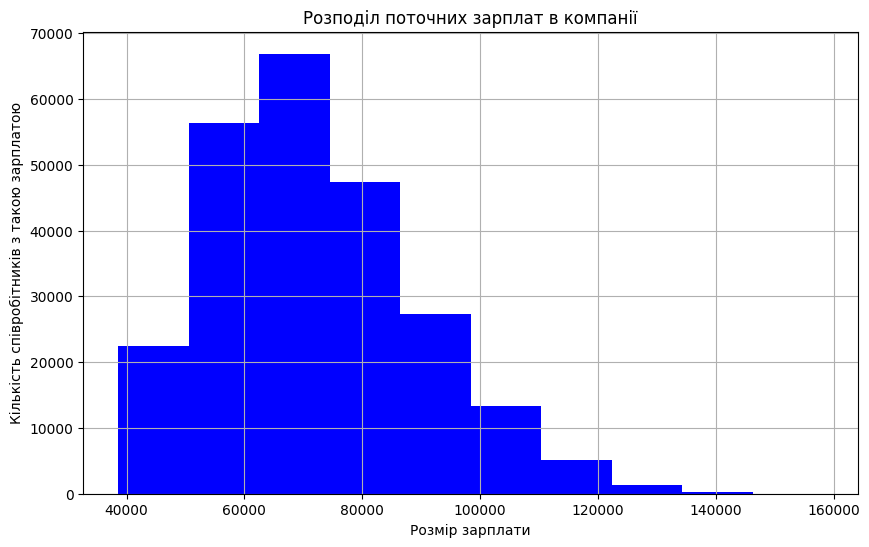

In [73]:
plt.figure(figsize=(10, 6))
plt.hist(active_employees['salary'], color='blue')
plt.title('Розподіл поточних зарплат в компанії')
plt.xlabel('Розмір зарплати')
plt.ylabel('Кількість співробітників з такою зарплатою')
plt.grid()
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [74]:
con.close()